In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nengo
import scipy
import pandas as pd
from model_0 import *

palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.0)
plt.rcParams['axes.formatter.use_mathtext'] = True

In [2]:
def plot_network(net, bids=[1], trials=10):
    sim = nengo.Simulator(net, dt=net.env.dt, progress_bar=False)    
    with sim:
        sim.run(net.env.t_load)
        for bid in bids:
            # env.set_reward_schedule()
            for trial in net.env.empirical.query("sid==@sid & bid==@bid")['trial'].unique()[:trials]:
                print(f"running sid {net.env.sid}, block {bid}, trial {trial}")
                net.env.set_cue(bid, trial)
                sim.run(net.env.t_cue)
                env.set_action(sim, net)
                env.set_omega(sim, net)
                env.set_reward(bid, trial)
                sim.run(net.env.t_reward)
    return sim

## Dynamics

In [ ]:
sid = 1
bids = [6]
env = Environment(sid=sid)
net = build_network(env)
sim = plot_network(net, bids=bids, trials=80)

running sid 1, block 6, trial 1
running sid 1, block 6, trial 2
running sid 1, block 6, trial 3
running sid 1, block 6, trial 4
running sid 1, block 6, trial 5
running sid 1, block 6, trial 6
running sid 1, block 6, trial 7
running sid 1, block 6, trial 8
running sid 1, block 6, trial 9
running sid 1, block 6, trial 10
running sid 1, block 6, trial 11
running sid 1, block 6, trial 12
running sid 1, block 6, trial 13
running sid 1, block 6, trial 14
running sid 1, block 6, trial 15
running sid 1, block 6, trial 16
running sid 1, block 6, trial 17
running sid 1, block 6, trial 18
running sid 1, block 6, trial 19
running sid 1, block 6, trial 20
running sid 1, block 6, trial 21
running sid 1, block 6, trial 22
running sid 1, block 6, trial 23
running sid 1, block 6, trial 24
running sid 1, block 6, trial 25
running sid 1, block 6, trial 26
running sid 1, block 6, trial 27
running sid 1, block 6, trial 28
running sid 1, block 6, trial 29
running sid 1, block 6, trial 30
running sid 1, bloc

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=7, sharey=True, figsize=(14, 4))
axes[0].plot(sim.trange(), sim.data[net.p_value_letter][:,0], label='A')
axes[0].plot(sim.trange(), sim.data[net.p_value_letter][:,1], label='B')
axes[1].plot(sim.trange(), sim.data[net.p_value_location][:,0], label='L')
axes[1].plot(sim.trange(), sim.data[net.p_value_location][:,1], label='R')
axes[2].plot(sim.trange(), sim.data[net.p_omega], label='omega')
axes[2].plot(sim.trange(), sim.data[net.p_omega_target], label='target')
# axes[2].plot(sim.trange(), sim.data[net.p_diff][:,0], label='delta rel')
# axes[2].plot(sim.trange(), sim.data[net.p_diff][:,1], label='sign')
# axes[2].plot(sim.trange(), sim.data[net.p_diff][:,2], label='omega in diff')
# axes[2].plot(sim.trange(), sim.data[net.p_delta_rel], label='delta_rel')
# axes[2].plot(sim.trange(), sim.data[net.p_diff_output], label='diff_output')
axes[3].plot(sim.trange(), sim.data[net.p_value_left], label='L')
axes[3].plot(sim.trange(), sim.data[net.p_value_right], label='R')
axes[4].plot(sim.trange(), sim.data[net.p_action][:,0], label='L')
axes[4].plot(sim.trange(), sim.data[net.p_action][:,1], label='R')
axes[5].plot(sim.trange(), sim.data[net.p_reward][:,0], label='L')
axes[5].plot(sim.trange(), sim.data[net.p_reward][:,1], label='R')
# axes[6].plot(sim.trange(), sim.data[net.p_error][:,0], label='L')
# axes[6].plot(sim.trange(), sim.data[net.p_error][:,1], label='R')
# axes[6].plot(sim.trange(), sim.data[net.p_error][:,2], label='rate L')
# axes[6].plot(sim.trange(), sim.data[net.p_error][:,3], label='rate R')
axes[6].plot(sim.trange(), sim.data[net.p_decay][:,0], label='L')
axes[6].plot(sim.trange(), sim.data[net.p_decay][:,1], label='R')
axes[6].plot(sim.trange(), sim.data[net.p_decay][:,2], label='rate L')
axes[6].plot(sim.trange(), sim.data[net.p_decay][:,3], label='rate R')
# axes[0].set(title='value of choose L')
# axes[1].set(title='value of choose R')
axes[0].set(title='letter value')
axes[1].set(title='location value')
axes[2].set(title='omega')
axes[3].set(title='total value')
axes[4].set(title='action')
axes[5].set(title='reward')
axes[6].set(title='error/decay')
axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()
axes[4].legend()
axes[5].legend()
axes[6].legend()
# axes[0].axvline(env.t_load, color=palette[3])
# axes[1].axvline(env.t_load, color=palette[3])
# axes[2].axvline(env.t_load, color=palette[3])
# axes[3].axvline(env.t_load, color=palette[3])
# axes[4].axvline(env.t_load, color=palette[3])
# axes[5].axvline(env.t_load, color=palette[3])
# axes[6].axvline(env.t_load, color=palette[3])
for bid in bids:
    reversal_at_trial = env.empirical.query("sid==@sid & bid==@bid")['reversal_at_trial'].unique()[0]
    axes[0].axvline(reversal_at_trial, color=palette[2])
    axes[1].axvline(reversal_at_trial, color=palette[2])
    axes[2].axvline(reversal_at_trial, color=palette[2])
    axes[3].axvline(reversal_at_trial, color=palette[2])
    axes[4].axvline(reversal_at_trial, color=palette[2])
    axes[5].axvline(reversal_at_trial, color=palette[2])
    axes[6].axvline(reversal_at_trial, color=palette[2])
fig.tight_layout()

# fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(4, 2))
# axes[0].plot(sim.trange(), sim.data[net.p_letter], label='letter')
# axes[1].plot(sim.trange(), sim.data[net.p_location], label='location')
# axes[0].set(title="letter")
# axes[1].set(title="location")
# fig.tight_layout()

## Simulate all behavioral data

In [ ]:
empirical = pd.read_pickle("data/empirical.pkl")
dfs = []
for sid in empirical['sid'].unique():
    env = Environment(sid=sid)
    net = build_network(env)
    sim, data = simulate_network(net)
    dfs.append(data)
simulated = pd.concat(dfs, ignore_index=True)
simulated.to_pickle("data/simulated.pkl")

## Load

In [44]:
empirical = pd.read_pickle("data/empirical.pkl")
dfs = []
for sid in empirical['sid'].unique():
    data = pd.read_pickle(f"data/model0_sid{sid}_behavior.pkl")
    dfs.append(data)
simulated = pd.concat(dfs, ignore_index=True)
simulated.to_pickle("data/simulated.pkl")

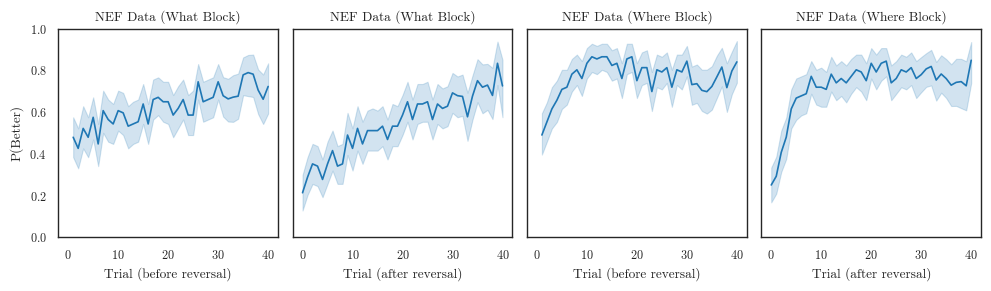

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, sharex=True, figsize=(10, 3))
sns.lineplot(simulated.query("bid<13 & trial_before_reversal<=40"), x='trial_before_reversal', y='accuracy', color=palette[0], ax=axes[0])
sns.lineplot(simulated.query("bid<13 & trial_after_reversal<=40"), x='trial_after_reversal', y='accuracy', color=palette[0], ax=axes[1])
sns.lineplot(simulated.query("bid>=13 & trial_before_reversal<=40"), x='trial_before_reversal', y='accuracy', color=palette[0], ax=axes[2])
sns.lineplot(simulated.query("bid>=13 & trial_after_reversal<=40"), x='trial_after_reversal', y='accuracy', color=palette[0], ax=axes[3])
axes[0].set(ylabel="P(Better)", xlabel='Trial (before reversal)', title='NEF Data (What Block)', ylim=(0, 1))
axes[1].set(xlabel='Trial (after reversal)', title='NEF Data (What Block)')
axes[2].set(xlabel='Trial (before reversal)', title='NEF Data (Where Block)')
axes[3].set(xlabel='Trial (after reversal)', title='NEF Data (Where Block)')
fig.tight_layout()

## Compare to monkey accuracy

In [24]:
def monkey_trends():
    dfs = []
    columns = ['sid', 'bid', 'trial_before_reversal', 'trial_after_reversal', 'accuracy']
    empirical = pd.read_pickle("data/empirical.pkl")
    for sid in empirical['sid'].unique():
        for bid in empirical.query("sid==@sid")['bid'].unique():
            print(sid, bid)
            for trial in empirical.query("sid==@sid & bid==@bid")['trial'].unique():
                reversal_at_trial = empirical.query("sid==@sid & bid==@bid")['reversal_at_trial'].unique()[0]
                accuracy = empirical.query("sid==@sid & bid==@bid & trial==@trial")['monkey_accuracy'].unique()[0]
                trial_before_reversal = trial if trial<reversal_at_trial else None
                trial_after_reversal = trial - reversal_at_trial if trial>=reversal_at_trial else None
                dfs.append(pd.DataFrame([[sid, bid, trial_before_reversal, trial_after_reversal, accuracy]], columns=columns))
    data = pd.concat(dfs, ignore_index=True)
    data.to_pickle("data/monkey_accuracy.pkl")
    return data

In [25]:
monkey_accuracy = monkey_trends()

0 19
0 23
0 24
0 14
0 2
0 18
0 12
0 9
0 17
0 10
0 3
0 1
0 6
0 16
0 11
0 13
0 22
0 7
0 20
0 15
0 8
0 4
0 21
0 5
1 17
1 3
1 15
1 21
1 16
1 20
1 10
1 12
1 5
1 14
1 22
1 7
1 13
1 19
1 4
1 1
1 18
1 9
1 23
1 24
1 11
1 2
1 6
1 8
2 6
2 11
2 12
2 23
2 14
2 8
2 2
2 19
2 3
2 15
2 21
2 7
2 5
2 17
2 4
2 10
2 1
2 9
2 22
2 13
2 24
2 16
2 18
2 20
3 17
3 12
3 9
3 14
3 24
3 4
3 8
3 2
3 6
3 18
3 19
3 23
3 16
3 10
3 22
3 3
3 1
3 20
3 15
3 21
3 13
3 7
3 5
3 11
4 18
4 17
4 14
4 15
4 23
4 9
4 12
4 21
4 3
4 20
4 4
4 16
4 6
4 13
4 1
4 22
4 2
4 11
4 24
4 19
4 7
4 8
4 5
5 16
5 23
5 6
5 22
5 10
5 3
5 7
5 17
5 18
5 15
5 11
5 4
5 2
5 12
5 8
5 21
5 24
5 19
5 9
5 13
5 1
5 20
5 14
5 5
6 23
6 20
6 9
6 11
6 1
6 2
6 8
6 18
6 16
6 6
6 24
6 15
6 7
6 5
6 14
6 10
6 17
6 4
6 21
6 3
6 19
6 13
6 22
7 1
7 12
7 14
7 20
7 19
7 13
7 4
7 17
7 8
7 23
7 5
7 6
7 16
7 22
7 24
7 7
7 10
7 3
7 9
7 21
7 15
7 18
7 11
7 2


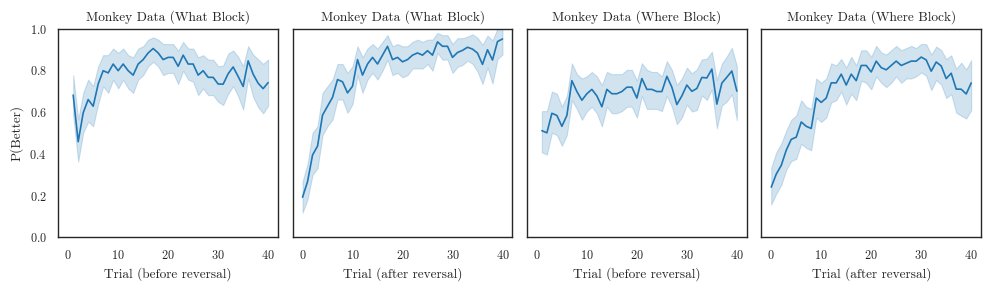

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, sharex=True, figsize=(10, 3))
sns.lineplot(monkey_accuracy.query("bid<13 & trial_before_reversal<=40"), x='trial_before_reversal', y='accuracy', color=palette[0], ax=axes[0])
sns.lineplot(monkey_accuracy.query("bid<13 & trial_after_reversal<=40"), x='trial_after_reversal', y='accuracy', color=palette[0], ax=axes[1])
sns.lineplot(monkey_accuracy.query("bid>=13 & trial_before_reversal<=40"), x='trial_before_reversal', y='accuracy', color=palette[0], ax=axes[2])
sns.lineplot(monkey_accuracy.query("bid>=13 & trial_after_reversal<=40"), x='trial_after_reversal', y='accuracy', color=palette[0], ax=axes[3])
axes[0].set(ylabel="P(Better)", xlabel='Trial (before reversal)', title='Monkey Data (What Block)', ylim=(0, 1))
axes[1].set(xlabel='Trial (after reversal)', title='Monkey Data (What Block)')
axes[2].set(xlabel='Trial (before reversal)', title='Monkey Data (Where Block)')
axes[3].set(xlabel='Trial (after reversal)', title='Monkey Data (Where Block)')
fig.tight_layout()

## Combined Plot

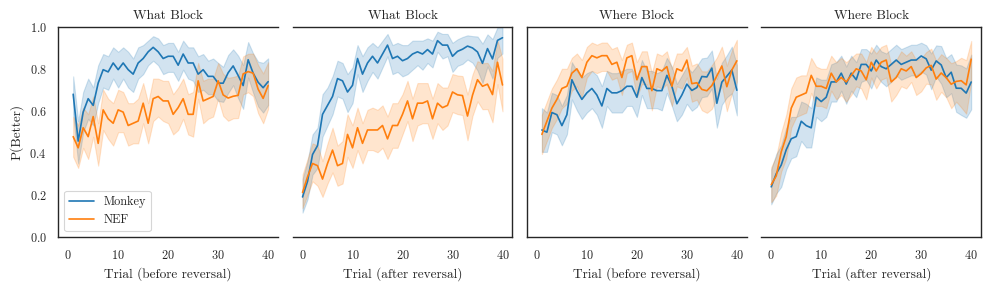

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, sharex=True, figsize=(10, 3))
sns.lineplot(monkey_accuracy.query("bid<13 & trial_before_reversal<=40"), x='trial_before_reversal', y='accuracy', color=palette[0], ax=axes[0], label='Monkey')
sns.lineplot(monkey_accuracy.query("bid<13 & trial_after_reversal<=40"), x='trial_after_reversal', y='accuracy', color=palette[0], ax=axes[1])
sns.lineplot(monkey_accuracy.query("bid>=13 & trial_before_reversal<=40"), x='trial_before_reversal', y='accuracy', color=palette[0], ax=axes[2])
sns.lineplot(monkey_accuracy.query("bid>=13 & trial_after_reversal<=40"), x='trial_after_reversal', y='accuracy', color=palette[0], ax=axes[3])
sns.lineplot(simulated.query("bid<13 & trial_before_reversal<=40"), x='trial_before_reversal', y='accuracy', color=palette[1], ax=axes[0], label='NEF')
sns.lineplot(simulated.query("bid<13 & trial_after_reversal<=40"), x='trial_after_reversal', y='accuracy', color=palette[1], ax=axes[1])
sns.lineplot(simulated.query("bid>=13 & trial_before_reversal<=40"), x='trial_before_reversal', y='accuracy', color=palette[1], ax=axes[2])
sns.lineplot(simulated.query("bid>=13 & trial_after_reversal<=40"), x='trial_after_reversal', y='accuracy', color=palette[1], ax=axes[3])
axes[0].legend()
axes[0].set(ylabel="P(Better)", xlabel='Trial (before reversal)', title='What Block', ylim=(0, 1))
axes[1].set(xlabel='Trial (after reversal)', title='What Block')
axes[2].set(xlabel='Trial (before reversal)', title='Where Block')
axes[3].set(xlabel='Trial (after reversal)', title='Where Block')
axes[0].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[3].spines['left'].set_visible(False)
fig.tight_layout()